<a href="https://colab.research.google.com/github/LuizBattaglia/DoubleTea/blob/master/modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação em Python para Análise de Dados

###  Modelagem

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import wooldridge as woo
import statsmodels.formula.api as smf
import seaborn as sns
import pmdarima as pm

plt.rcParams['figure.dpi'] = 200

## Regressão Linear

Uma maneira simples e poderosa de resumir o relacionamento (de preferência linear) de duas variáveis é através de um modelo linear, que podemos expressar como:

\begin{align}
Y_i = \beta_0 + \beta X_i + \epsilon_i
\end{align}

Onde $Y_i$ é o que chamamos de variável de reposta, variável explicada ou variável dependente. $\beta_0$ é uma constante, $\beta$ é o parâmetro que dá a magnitude em que uma variação de $X$, que chamamos de variável explicativa, covariada ou variável independente, leva a variável de resposta a variar. Por fim, $\epsilon_i$ é um termo de erro, $i$ é um índice para indexar observações da amostra. Normalmente assumimos que $\epsilon \sim N(0,\sigma^2)$. Essa hipótese de normalidade dos erros faz com que a distribuição da variável de resposta seja normal, com média $\mu_{Y | X} = \beta_0 + \beta_i$ e variância $\sigma^2$.

Em um modelo de regressão linear simples, podemos estimar o parâmetro $\beta$ rapidamente através do estimador de Mínimos Quadrados Ordinários:

\begin{align}
\hat{\beta} = \text{arg min}_{\beta} \sum_{i=1}^n (y_i - \beta x_i)^2
\end{align}



Podemos estender esse modelo para contemplar múltiplas variáveis como regressores. A regressão múltipla nos abre portas para tentar modelar variáveis que dependem de várias outras. Essas outras variáveis podem ser diferentes, potências de uma variável que já temos, funções delas... As possibilidades são grandes. Boa parte do aparato da regressão linear simples se mantém no caso com várias variáveis.

De uma maneira bem geral, os modelos agora terão essa forma:

\begin{align}
y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon_i
\end{align}

Temos agora $p + 1$ parâmetros em uma forma funcional linear. Agora entendemos que os valores de $y_i$ são amostras independentes de uma distribuição normal com média $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$ e variância $\sigma^2$. Se os valores das variáveis $x_i$ são aleatórios, isso também é verdade para as médias condicionais.



Esse estimador está implementado no Python, através da função "ols" do pacote *statsmodels*. Já a tabela de saída, com os principais resultados da regressão, é feito com a função "summary".

Para mostrar isso, vamos utilizar uma base de dados com várias características de pessoas, incluindo salário por hora, educação e experiência. Assim, iremos estimar um modelo com o salário como variável dependente (Y) e educação e experiência como indepentes (X).

In [ ]:
import wooldridge as woo

wage1 = woo.dataWoo('wage1')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [ ]:
reg2 = smf.ols(formula='wage ~ educ + exper', data=wage1)
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     75.99
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.07e-29
Time:                        09:29:58   Log-Likelihood:                -1366.0
No. Observations:                 526   AIC:                             2738.
Df Residuals:                     523   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3905      0.767     -4.423      0.000      -4.896      -1.885
educ           0.6443      0.054     11.974      0.000       0.539       0.750
exper          0.0701      0.011      6.385      0.000       0.049       0.092
==============================================================================
Omnibus:                      196.872   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.160
Skew:                           1.715   Prob(JB):                    1.26e-158
Kurtosis:                       7.627   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Veja que temos os parâmetros estimados (*coef*), p-valor do teste T (*P>|t|*), R-quadrado (*R-squared*), teste F (*F-statistic*), entre outros indicadores de interesse.

## Arima

Arima é uma sigla para *autoregressive integrated moving average*, em português, modelo auto-regressivo integrado de médias móveis. É um dos principais modelos utilizados para econometria de séries temporais, principalmente em termo de previsão.

Um modelo ARIMA pode ser melhor entendido com a descrição dos seus componentes:

    - Autoregressivo (AR):
\begin{equation}
Y_{t}=\alpha_{1} Y_{t-1}
\end{equation}

    -Integrado (I): representa a diferenciação para tornar as séries estacionárias.

    -Médias móveis (MA):  
    
\begin{equation}
Y_{t}=e_{t}-\beta e_{t-1}
\end{equation}

Assim, cada componente é representado por um parâmetro:

    -p: Número de lags do componente AR
    -d: Número de diferenciações
    -q: O tamanho da janela de médias móveis
    
    
Para estimar esse modelo no Python poderiamos também utilizar a biblioteca *statsmodels*. Entretanto, tem ganhado popularidade o algoritmo que cria um arima com parâmetros otimizados, o "Auto Arima", que pode ser aplicado com o pacote *pmdarima*.

Demonstraremos utilizando o dataset "earns", também do pacote do wooldridge.  Aqui, temos dados econômicos sobre os salários e a produção nos Estados Unidos de 1947 até 1987.

In [ ]:
earns = woo.dataWoo('earns')
earns.head()

,year,wkearns,wkhours,outphr,hrwage,lhrwage,loutphr,t,ghrwage,goutphr,ghrwge_1,goutph_1,goutph_2,lwkhours
0,1947,123.519997,40.299999,51.400002,3.065012,1.120052,3.939638,1,NaN,NaN,NaN,NaN,NaN,3.696352
1,1948,123.430000,40.000000,53.299999,3.085750,1.126795,3.975936,2,0.006743,0.036298,NaN,NaN,NaN,3.688879
2,1949,127.839996,39.400002,54.200001,3.244670,1.177014,3.992681,3,0.050219,0.016745,0.006743,0.036298,NaN,3.673766
3,1950,133.830002,39.799999,57.700001,3.362563,1.212703,4.055257,4,0.035690,0.062576,0.050219,0.016745,0.036298,3.683867
4,1951,134.869995,39.900002,59.400002,3.380200,1.217935,4.084294,5,0.005231,0.029037,0.035690,0.062576,0.016745,3.686376


Para estimarmos, basta utilizarmos a função **auto_arima**. Já para retornarmos a previsão, é preciso usar o **predict**, que retorna também o intervalo de confiança das previsões.

In [ ]:
y = earns["wkearns"]

model = pm.auto_arima(y)

forecasts = model.predict(12,return_conf_int=True)

forecasts

(array([167.24401674, 166.15892464, 165.43047913, 164.40117178,
        163.14285052, 161.94867095, 160.86705456, 159.78880026,
        158.66454505, 157.52659353, 156.40414748, 155.29155243]),
 array([[160.56281969, 173.92521378],
        [154.12011371, 178.19773556],
        [149.98909282, 180.87186544],
        [146.14652694, 182.65581662],
        [141.59678311, 184.68891793],
        [136.56375579, 187.33358612],
        [131.48968623, 190.24442289],
        [126.39651922, 193.1810813 ],
        [121.12778393, 196.20130618],
        [115.64353352, 199.40965354],
        [109.99920354, 202.80909142],
        [104.22932312, 206.35378174]]))

Da mesma forma que em relação ao modelo de regressão linear, a função **summary** retorna os parâmetros e outros indicadores do modelo estimado.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -103.862
Date:                Sun, 18 Jul 2021   AIC                            215.723
Time:                        20:57:10   BIC                            222.378
Sample:                             0   HQIC                           218.111
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.173      1.543      0.123      -0.072       0.607
ar.L2         -0.4167      0.166     -2.510      0.012      -0.742      -0.091
ma.L1         -0.7683      0.127     -6.026      0.000      -1.018      -0.518
sigma2        11.6202      3.208      3.622      0.000       5.332      17.908
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.81   Prob(JB):                         0.81
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

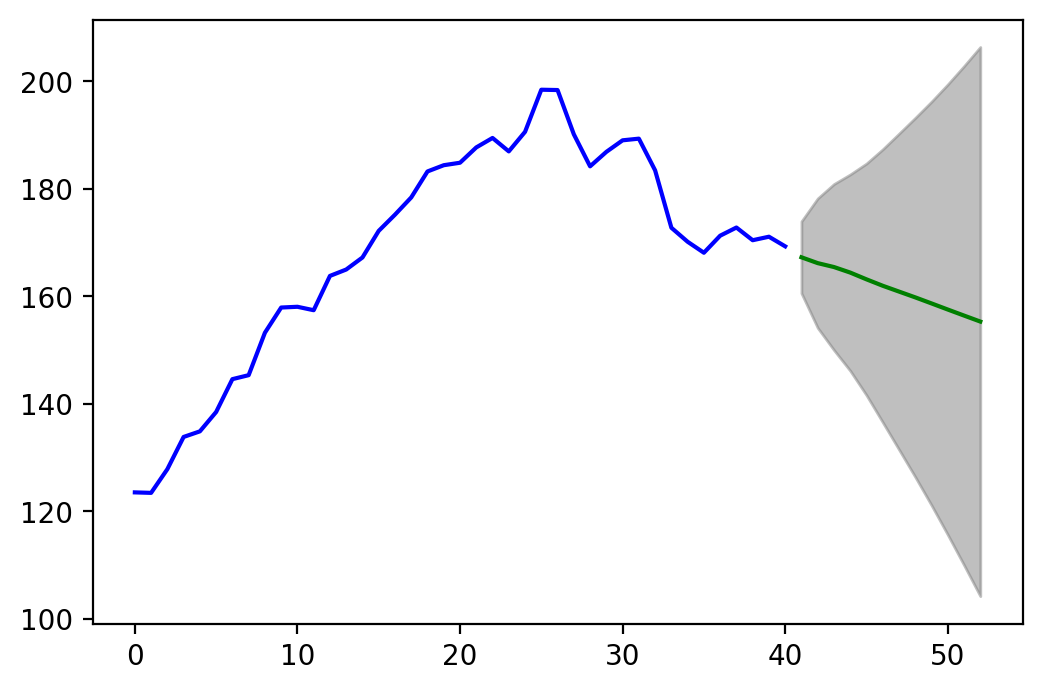

In [ ]:
obs = y.shape[0]

x = np.arange(y.shape[0] + 12)
plt.plot(x[:obs], y, c='blue')
plt.plot(x[obs:], forecasts[0], c='green')

conf_int = np.asarray(forecasts[1])

plt.fill_between(x[obs:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.5, color='grey',
                     label="Confidence Intervals")

## Dados em Painel

Também podemos estimar modelos de dados em painel no Python. Para isso podemos usar a biblioteca **linearmodels**. Utilizaremos um dataset do pacote com dados de característica de trabalhadores, incluindo os salários. O identificador de grupo é "nr" e o de tempo identificada é "year".  

In [ ]:
from linearmodels.datasets import wage_panel
import pandas as pd

data = wage_panel.load()
year = pd.Categorical(data.year)
data = data.set_index(["nr", "year"])
data["year"] = year
data.head()

black  exper  hisp  hours  married  educ  union     lwage  expersq  \
nr year                                                                       
13 1980      0      1     0   2672        0    14      0  1.197540        1   
   1981      0      2     0   2320        0    14      1  1.853060        4   
   1982      0      3     0   2940        0    14      0  1.344462        9   
   1983      0      4     0   2960        0    14      0  1.433213       16   
   1984      0      5     0   3071        0    14      0  1.568125       25   

         occupation  year  
nr year                    
13 1980           9  1980  
   1981           9  1981  
   1982           9  1982  
   1983           9  1983  
   1984           5  1984

Podemos estimar um modelo Pooled OLS com a função "Pooled OLS". Esta biblioteca utiliza um jeito diferente de estimação, sem o uso de fórmula. Assim, precisamos indicar as variáveis dependentes e independentes.

In [ ]:
from linearmodels.panel import PooledOLS, RandomEffects
import statsmodels.api as sm

exog_vars = ["black", "hisp", "exper", "expersq", "married", "educ", "union", "year"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.lwage, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.1893
Estimator:                  PooledOLS   R-squared (Between):              0.2066
No. Observations:                4360   R-squared (Within):               0.1692
Date:                Sun, Jul 18 2021   R-squared (Overall):              0.1893
Time:                        20:57:11   Log-likelihood                   -2982.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      72.459
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(14,4345)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             72.459
                            

Da mesma forma, podemos estimar um modelo de efeitos aleatórios.

In [ ]:
mod = RandomEffects(data.lwage, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1806
Estimator:              RandomEffects   R-squared (Between):              0.1853
No. Observations:                4360   R-squared (Within):               0.1799
Date:                Sun, Jul 18 2021   R-squared (Overall):              0.1828
Time:                        20:57:11   Log-likelihood                   -1622.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      68.409
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(14,4345)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             68.409
                            

## Scikit Learn

O Machine learning é um campo ainda em exploração para os Economistas. Entretanto, vem ganhando muita força, principalmente na área de pesquisa empírica e previsão. Existem várias blibliotecas no Python que fornecem ferramentas para a estimação destes modelos: Scikit-Learn, Pytorch, TensorFlow e Keras, entre as mais conhecidas. Iremos fazer uma breve introdução à primeira, mostrando como construir algoritmos de regressão e classificação de forma intuitiva.

São diversas as possiblidades de modelos pelo Scikit-Learn. Por exemplo, podemos fazer um modelo de regressão linear. Para isso, vamos simular alguns dados:

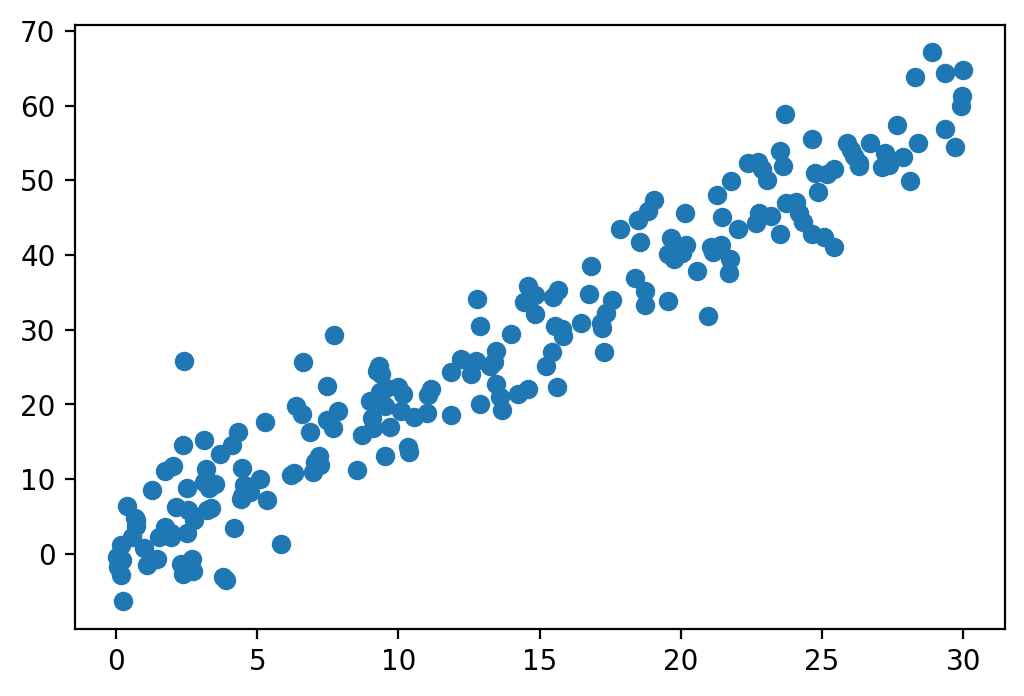

In [ ]:
rng = np.random.RandomState(46)
sigma = 5
x = 30 * rng.rand(200)
y = 2 * x  + rng.randn(200)*sigma
plt.scatter(x, y);

O padrão do Sklearn é importar o modelo que você quer utilizar - no caso "LinearRegression" - e colocar os parâmetros que desejar na função. Diferentemente do **statsmodels** nós não utilizamos a fórmula dentro da função. Ao invés disso, separamos as variáveis em X e Y.

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]

ols.fit(X, y)

LinearRegression()

Podemos obter os coeficientes estimados, assim como os valores preditos.

[1.98411059]


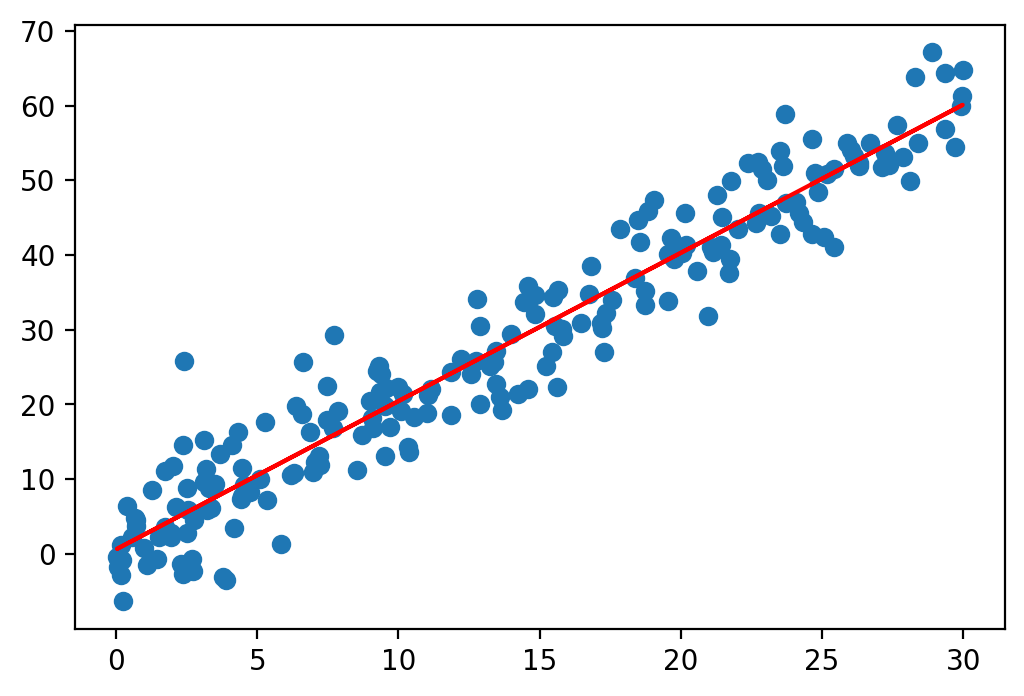

In [ ]:
print(ols.coef_)

yfit = ols.predict(X)

plt.scatter(x, y)
plt.plot(X, yfit, "red");

A outra classe de modelos possível são os modelos de classificação. Que tentam prever de qual grupo a observação faz parte, baseado nos dados. Um exemplo pode ser demonstrado pelo dataset "iris", que traz características de uma flor de acordo com a espécie. Assim iremos tentar prever a espécie baseado nestas características.

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Como foi dito, é necessário separar entre X e Y. Iremos utilizar apenas as duas primeiras colunas para tentar prever.

In [ ]:
X_iris = iris[["sepal_length","sepal_width"]]

y_iris = iris['species']

Além de separarmos em X e Y, iremos separar os dados entre treino e teste. Iremos modelar os dados no treino e testar a performance no teste.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

Iremos utilizar o algorítmo de Random Forest, que é uma extensão dos modelos de árvore de decisão. Assim, basta utilizarmosa função **fit**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =   RandomForestClassifier()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
y_model

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa'], dtype=object)

E testar a performance utilizando alguma métrica, no caso, a acurácia.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7894736842105263

Tradicionalmente na área de machine learning, tentamos melhorar a performance do modelo utilizando outros algorítimos de previsão. No caso, podemos tentar estimar um modelo **Naive Bayes**, importando "GaussianNB".

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

accuracy_score(ytest, y_model)

0.8157894736842105